In [17]:
import numpy as np
import free_twopac as ftp 
import parser_scc2020 as pscc

The following sphere generating function was (shamelessly) stolen from [twopac](https://gitlab.com/flenzen/2pac)

In [18]:
def sphere(sample_size, ambient_dimension, vertical_noise=0):
    points = np.zeros((0, ambient_dimension))
    while points.shape[0] < sample_size:
        new_sample_size = sample_size-points.shape[0]
        new_points = np.random.random_sample(size=(new_sample_size, ambient_dimension)) * 2 - 1
        norms      = np.linalg.norm(new_points, axis=1)
        selection  = norms > 0.1
        points     = np.vstack((points, new_points[selection,:] / norms[selection, None]))
    noise = np.sqrt(np.random.chisquare(4, sample_size)) * vertical_noise
    points = points + noise[:, None] *points
    return points

points = sphere(100,2, 0.5)
grades = points.transpose()[0]

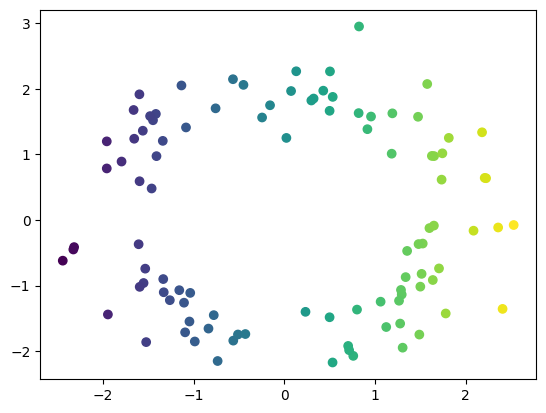

In [19]:
ftp.print_points(points,grades, "circle_frips/circle.png")

In [20]:
bd = ftp.fr_Hres(points,grades, 1)

pscc.scc2020_from_bdf(bd, "./circle_frips/circle_bdf.txt")

Strong filtration domination reduction                                          
    Edges before: 4950
    Edges after: 412 (8%)
  Strong filtration domination reduction                                              31ms
Number of 1-simplices: 412
Chunk (cochain complex): minimize D^1                                           
    Minimize                                                                    
        Find local pairs                                                             0ms
        Input size: 412x100; local pairs: 0; Output size: 412x100
        Eliminate local entries.                                                     0ms
      Minimize                                                                         0ms
  Chunk (cochain complex): minimize D^1                                                0ms
Number of 2-simplices: 614
Chunk (cochain complex)                                                         
    truncate columns of D^2                             